<h1><center>Introduction</center></h1>

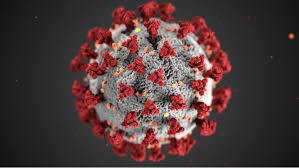
    

<br>
<center>The first case of the 2019–20 coronavirus pandemic in India was reported on 30 January 2020, originating from China. Experts suggest the number of infections could be much higher as India's testing rates are among the lowest in the world. The infection rate of COVID-19 in India is reported to be 1.7, significantly lower than in the worst affected countries.<br>


<br>The outbreak has been declared an epidemic in more than a dozen states and union territories, where provisions of the Epidemic Diseases Act, 1897 have been invoked, and educational institutions and many commercial establishments have been shut down. India has suspended all tourist visas, as a majority of the confirmed cases were linked to other countries.<br>

<br>On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi. The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities. Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.<br>

<br>The World Health Organisation chief executive director of health emergencies programme Michael Ryan said that India had "tremendous capacity" to deal with the coronavirus outbreak and, as the second most populous country, will have enormous impact on the world's ability to deal with it.Other commentators worried about the economic devastation caused by the lockdown, which has huge effects on informal workers, micro and small enterprises, farmers and the self-employed, who are left with no livelihood in the absence of transportation and access to markets. The lockdown was justified by the government and other agencies for being preemptive to prevent India from entering a higher stage which could make handling very difficult and cause even more losses thereafter.<br>

<br>According to a study at Shiv Nadar University, India could have witnessed a surge of 31,000 cases of disease between March 24 and April 14 without lockdown.</center>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import datetime as dt
import matplotlib.image as pltimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import folium.plugins
from geopy.geocoders import Nominatim
from matplotlib import pyplot


# Global Analysis

## Total confirmed cases : 2,557,994 

## Total deaths recorded : 177,688

## Total recovered cases : 695,355

## Active Cases : 1,684,951
## Currently Infected Patients : 

### 1,627,669 (97%) in Mild Condition

### 57,282 (3%) Serious or Critical

Data Source : https://www.worldometers.info/coronavirus/#countries


In [ ]:
world_data=pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

world_data.head()
world_data.dtypes
world_data['Date'] = pd.to_datetime(world_data['Date'])
world_data['Date'].max()
world_grouped=world_data.loc[world_data['Date']=='2020-04-30']
world_grouped=world_grouped.sort_values(['Confirmed'],ascending=False)
world_grouped["Death Rate (per 100)"] = np.round(100*world_grouped["Deaths"]/world_grouped["Confirmed"],2)
world_grouped["Cure Rate (per 100)"] = np.round(100*world_grouped["Recovered"]/world_grouped["Confirmed"],2)
world_grouped.head()

In [ ]:
world_grouped.drop(['Lat','Long'],axis=1).groupby(['Country/Region'],as_index=False).sum().sort_values(['Confirmed'],ascending=False).head(26).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Reds',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])\
                        

In [ ]:
world_population = pd.read_csv('../input/population-by-country-2020/population_by_country_2020.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
fig = px.choropleth(world_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,7000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases as of today')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
world_data.groupby(['Date'],as_index=False)[['Confirmed']].sum()

In [ ]:
fig = px.line(world_data.groupby(['Date'],as_index=False)[['Confirmed']].sum(), 
             x="Date", y="Confirmed", 
             title='Number of cases worldwide from start COVID-19', 
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
import matplotlib.dates as mdates

In [ ]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
for country in hotspots:
    k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
    global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,15))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of April 20',fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

# India analysis

In [ ]:
cases=pd.read_csv('/kaggle/input/covid19-corona-virus-india-dataset/complete.csv')
cases.dtypes

cases['Date'] = pd.to_datetime(cases['Date'])
cases.dtypes
cases.tail()

In [ ]:
current_status=cases.loc[cases['Date']=='2020-05-03']
current_status['active']=current_status['Total Confirmed cases']-(current_status['Cured/Discharged/Migrated']+current_status['Death'])
current_status['mortality']=(current_status['Death']/current_status['Total Confirmed cases'])*100

today=current_status['Total Confirmed cases'].sum()

cases.loc[cases['Date']=='20-04-2020']
yesterday_cases=cases.loc[cases['Date']=='23-04-2020']['Total Confirmed cases'].sum()
today-yesterday_cases

In [ ]:
population=pd.read_csv('/kaggle/input/covid19-in-india/population_india_census2011.csv')
population=population.drop(['Rural population','Urban population','Area','Gender Ratio'],axis=1)
current_status_pop=pd.merge(population,current_status,left_on='State / Union Territory',right_on='Name of State / UT')

In [ ]:
current_status_pop['percentage of population affected']=(current_status_pop['Total Confirmed cases']/current_status_pop['Population'])*100
current_status_pop["Death Rate (per 100)"] = np.round(100*current_status_pop["Death"]/current_status_pop["Total Confirmed cases"],2)
current_status_pop["Cure Rate (per 100)"] = np.round(100*current_status_pop["Cured/Discharged/Migrated"]/current_status_pop["Total Confirmed cases"],2)

In [ ]:
fig = px.line(cases.groupby(['Date'],as_index=False)[['Total Confirmed cases']].sum(), 
             x="Date", y="Total Confirmed cases", 
             title='Number of cases from start COVID-19 ie 30 JAN', 
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8)

fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
current_status_pop.drop(['Total Confirmed cases (Indian National)','Total Confirmed cases ( Foreign National )','Latitude', 'Longitude','Population','Density','Sno','Name of State / UT','Date'],axis=1).sort_values(['Total Confirmed cases'],ascending=False).head(26).style.background_gradient(cmap='Blues',subset=["Total Confirmed cases"])\
                        .background_gradient(cmap='Reds',subset=["Death"])\
                        .background_gradient(cmap='Greens',subset=["Cured/Discharged/Migrated"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["mortality"])\
                        .background_gradient(cmap='Reds',subset=["percentage of population affected"])\
                        .background_gradient(cmap='Reds',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])\

In [ ]:
india_covid_19 = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')

In [ ]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)

In [ ]:
import matplotlib.dates as mdates

In [ ]:
all_state = list(india_covid_19['State/UnionTerritory'].unique())
all_state.remove('Unassigned')
#all_state.remove('Nagaland#')
#all_state.remove('Nagaland')
latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

fig = plt.figure(figsize= (25,17))
plt.suptitle('5-Day Moving Average of Confirmed Cases in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    moving_aves = calc_movingaverage(states_confirmed[states[k]],5)
    ax.plot(states_dates[states[k]][:-2],moving_aves,color='red',label = 'Moving Average',linewidth =3)  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

In [ ]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])


In [ ]:
fig = px.bar(current_status, 
             x="Name of State / UT", y="Total Confirmed cases", 
             title='Number of cases per state', 
             text='Total Confirmed cases', 
             orientation='v', 
             width=1400, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8, textposition='outside')

fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.treemap(current_status, path=['Name of State / UT'], values='Total Confirmed cases',
                  color='Total Confirmed cases', hover_data=['Name of State / UT'],
                  color_continuous_scale='dense', title='Current number of cases in India by state')
fig.show()

In [ ]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

In [ ]:
fig = px.treemap(current_status_pop, path=['Name of State / UT'], values='percentage of population affected',
                  color='percentage of population affected', hover_data=['Name of State / UT'],
                  color_continuous_scale='dense', title='Current percentage of population affected by the virus in India by state')
fig.show()

In [ ]:
age_groups=pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
age_groups.head()

fig = px.bar(age_groups, 
             x="AgeGroup", y="TotalCases", 
             title='Number of cases per Age group', 
             text='TotalCases', 
             orientation='v', 
             width=800, height=700)
fig.update_traces(marker_color='#008000', opacity=0.8, textposition='outside')

fig.update_layout(template = 'plotly_dark')
fig.show()



In [ ]:
address = 'india'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of india are {}, {}.'.format(latitude, longitude))

In [ ]:


map_india = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, state, caser in zip(current_status['Latitude'], current_status['Longitude'], current_status['Name of State / UT'], current_status['Total Confirmed cases']):
    label = '{}, {}'.format(caser, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(int(np.sqrt(caser))),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india



In [ ]:
state_testing = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
state_testing.sort_values(['TotalSamples'],ascending=False).head(20).style.background_gradient(cmap='Reds')

In [ ]:
testing=state_testing.groupby('State').sum().reset_index()
fig = px.bar(testing, 
             x="TotalSamples",y="State", 
             orientation='h',
             text='TotalSamples',
             height=800,
             title='Testing statewise insight')
fig.update_traces(marker_color='#008000', opacity=0.8, textposition='outside')

fig.update_layout(template = 'plotly_dark')
fig.show()

In [ ]:
patients=pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
patients.head()

gender_patients=patients.groupby(['gender'],as_index=False)[['notes']].count()
gender_patients



In [ ]:
sizes=[]
labels = ['Male', 'Female']
sizes.append(list(patients['gender'].value_counts())[0])
sizes.append(list(patients['gender'].value_counts())[1])
explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

In [ ]:
f,axes = plt.subplots(2, 2, figsize=(15,10))
sns.distplot( current_status["Total Confirmed cases"] , color="blue", ax=axes[0, 0])
sns.distplot( current_status["Death"] , color="violet", ax=axes[0, 1])
sns.distplot( current_status["Cured/Discharged/Migrated"] , color="olive", ax=axes[1, 0])
sns.distplot( current_status["active"] , color="orange", ax=axes[1, 1])
f.subplots_adjust(hspace=.3,wspace=0.03) 

In [ ]:
ts=cases.groupby(['Date'],as_index=False)[['Total Confirmed cases']].sum()
ts.set_index('Date')
ts.dtypes

# Predictions

# ARIMA modelling with parameters as 5,2,0

Autoregressive Integrated Moving Average Model

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
<br><br>I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
<br><br>MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

   <br>p: The number of lag observations included in the model, also called the lag order.
   <br>d: The number of times that the raw observations are differenced, also called the degree of differencing.
   <br>q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.



In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts['Total Confirmed cases'], order=(5,2,0))
model_fit = model.fit()
model_fit.summary()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
next_20_day=pd.DataFrame(model_fit.forecast(20))
model_fit.forecast(20)

In [ ]:
next_20_day

In [ ]:
next_20_day=next_20_day.reset_index()

In [ ]:

lister=next_20_day.iloc[2].to_list()
minimum_case=[]
maximum_case=[]
for i in range(1,21,1):
    minimum_case.append(lister[i][0])
    maximum_case.append(lister[i][1])
minimum_case

import datetime
date_list=[]
base = datetime.datetime.today()
date_day=[]
date_list = [base + datetime.timedelta(days=x) for x in range(20)]
date_list
for i in range(20):
    date_day.append(date_list[i].day)
print(len(minimum_case))
print(len(date_list))
print(len(maximum_case))

print(lister[20])

In [ ]:
predictions=pd.DataFrame(columns=['Date','Best Case scenario','Worst case scenario'])
predictions['Date'] = date_list
predictions['Best Case scenario'] = minimum_case
predictions['Worst case scenario'] = maximum_case
predictions['Date'] = pd.to_datetime(predictions['Date']).dt.date
predictions

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predictions['Date'], y=predictions['Best Case scenario'],
                    mode='lines+markers',
                    name='Predicted Best case scenario'))
fig.add_trace(go.Scatter(x=predictions['Date'], y=predictions['Worst case scenario'],
                    mode='lines+markers',
                    name='Predicted worst case scenario'))
fig.add_trace(go.Scatter(y= prev_cases['Total Confirmed cases'],x= prev_cases['Date'],
                    mode='markers', name='markers'))

fig.show()

According to the ARIMA model we can see that by the end of the next 20 days the total number of cases may rise upto 64,700 (model fitting done based on the data available as of 21st.



# SEIR Model

The SEIR models the flows of people between four states: susceptible (S), exposed (E), infected (I), and resistant (R).

Each of those variables represents the number of people in those groups. The parameters alpha and beta partially control how fast people move from being susceptible to exposed (beta), from exposed to infected (sigma), and from infected to resistant (gamma). This model has two additional parameters; one is the background mortality (mu) which is unaffected by disease-state, while the other is vaccination (nu). The vaccination moves people from the susceptible to resistant directly, without becoming exposed or infected.

The SEIR differs from the SIR model in the addition of a latency period. Individuals who are exposed (E) have had contact with an infected person, but are not themselves infectious.

Instructions: The boxes on the right side of the page control the parameters of the model. The page should load with some parameters already in the box. Click "submit" to run the model. The parameters can all be modified and the model re-run. The parameters are Beta The parameter controlling how often a susceptible-infected contact results in a new exposure. Gamma The rate an infected recovers and moves into the resistant phase. Sigma The rate at which an exposed person becomes infective. Mu The natural mortality rate (this is unrelated to disease). This models a population of a constant size, Initial susceptible The number of susceptible individuals at the beginning of the model run. Initial exposed The number of exposed individuals at the beginning of the model run. Initial infected The number of infected individuals at the beginning of the model run. Initial recovered The number of recovered individuals at the beginning of the model run. Days Controls how long the model will run. This program runs on your computer, so some computers may run faster than others. It is probably a good idea not to set the number iterations or the initial populations too high, since it will take longer to run. Note that cookies must be enabled for the algorithm to function.

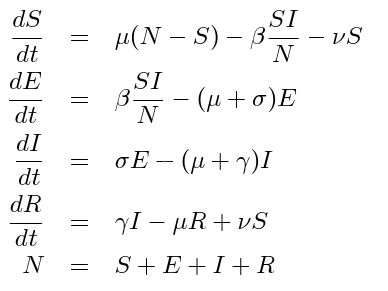

image.png Details: This is an ordinary differential equation model, described by the following equation: derivative of S with respect to t equals The simulation uses the fourth-order Runge-Kutta algorithm to solve it numerically, with a step size fixed at 0.01, written in JavaScript. The plotting methods are from the flot module. Both the ode simulation and the script in this page calling it are new, so there may still be some unanticipated bugs (I am also fairly new to the language, so my code may be inefficient or bizarre in places). Internet Explorer may not work since it has not yet adopted the canvas element, which is used in plotting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Any results you write to the current directory are saved as output.
train=pd.read_csv('/kaggle/input/coronavirus-2019ncov/covid-19-all.csv')

#print("Number of Country_Region -", train['Country/Region'].nunique())
#print("Dates from", min(train['Date']), "to day", max(train['Date']), "- total of", train['Date'].nunique(), "days")
#print("Countries with Province: ", train[train['Province/State'].isna()==False]['Country/Region'].unique())
train.head(5)

In [ ]:
country_df = train[train['Country/Region']=='India'].groupby('Date')['Confirmed','Deaths'].sum()
country_df['day_count'] = list(range(1,len(country_df)+1))
ydata = country_df.Confirmed
xdata = country_df.day_count
country_df['rate'] = (country_df.Confirmed-country_df.Confirmed.shift(1))/country_df.Confirmed
country_df['increase'] = (country_df.Confirmed-country_df.Confirmed.shift(1))

plt.plot(xdata, ydata, 'o')
plt.title("India")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()

In [ ]:
from scipy.optimize import curve_fit
import pylab


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y
#country_df.ConfirmedCases
#country_df.day_count
xdata = np.array([1, 2, 3,4, 5, 6, 7])
ydata = np.array([0, 0, 13, 35, 75, 89, 91])

#([low_a,low_b],[high_a,high_b])
#low x --> low b
#high y --> high c
#a is the sigmoidal shape.
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[100,2, 10.]))
print(popt)

x = np.linspace(-1, 10, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(-0.05, 105)
pylab.legend(loc='best')
pylab.show()

In [ ]:
in_df = train[train['Country/Region']=='India'].groupby('Date')['Confirmed','Deaths'].sum()
in_df = in_df[in_df.Confirmed>=100]

from scipy.optimize import curve_fit
import pylab
from datetime import timedelta

in_df['day_count'] = list(range(1,len(in_df)+1))
in_df['increase'] = (in_df.Confirmed-in_df.Confirmed.shift(1))
in_df['rate'] = (in_df.Confirmed-in_df.Confirmed.shift(1))/in_df.Confirmed


def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array(list(in_df.day_count)[::2])
ydata = np.array(list(in_df.Confirmed)[::2])

population=1.332*10**9
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[population,6, 100.]))
print(popt)

In [ ]:
est_a = 22500
est_b = 0.18
est_c = 32
x = np.linspace(-1, in_df.day_count.max()+50, 50)
y = sigmoid(x,est_a,est_b,est_c)
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit',alpha = 0.6)
pylab.ylim(-0.05, est_a*1.05)
pylab.xlim(-0.05, est_c*2.05)
pylab.legend(loc='best')
plt.xlabel('days from day 1')
plt.ylabel('confirmed cases')
plt.title('India')
pylab.show()


print('model start date:',in_df[in_df.day_count==1].index[0])
print('model start infection:',int(in_df[in_df.day_count==1].Confirmed[0]))
print('model fitted max infection at:',int(est_a))
print('model sigmoidal coefficient is:',round(est_b,3))
print('model curve stop steepening, start flattening by day:',int(est_c))
print('model curve flattens by day:',int(est_c)*2)
display(in_df.head(3))
display(in_df.tail(3))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm.notebook import tqdm
from scipy.integrate import solve_ivp
import numpy
import datetime
from datetime import timedelta

# Susceptible equation
def dS_dt(S, I, R_t, T_inf):
    return -(R_t / T_inf) * I * S

# Exposed equation
def dE_dt(S, E, I, R_t, T_inf, T_inc):
    return (R_t / T_inf) * I * S - (T_inc**-1) * E

# Infected equation
def dI_dt(I, E, T_inc, T_inf):
    return (T_inc**-1) * E - (T_inf**-1) * I

# Recovered/Remove/deceased equation
def dR_dt(I, T_inf):
    return (T_inf**-1) * I

def SEIR_model(t, y, R_t, T_inf, T_inc):
    
    if callable(R_t):
        reproduction = R_t(t)
    else:
        reproduction = R_t
        
    S, E, I, R = y
    
    S_out = dS_dt(S, I, reproduction, T_inf)
    E_out = dE_dt(S, E, I, reproduction, T_inf, T_inc)
    I_out = dI_dt(I, E, T_inc, T_inf)
    R_out = dR_dt(I, T_inf)
    
    return [S_out, E_out, I_out, R_out]

In [ ]:
import datetime
train = pd.read_csv('/kaggle/input/adeconvid19/train.csv')
test = pd.read_csv('/kaggle/input/adeconvid19/test.csv')
train['Date_datetime'] = train['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))

pop_info = pd.read_csv('/kaggle/input/covid19-population-data/population_data.csv')
country_pop = pop_info.query('Type == "Country/Region"')
province_pop = pop_info.query('Type == "Province/State"')
country_lookup = dict(zip(country_pop['Name'], country_pop['Population']))
province_lookup = dict(zip(province_pop['Name'], province_pop['Population']))

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint

from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
import warnings
warnings.filterwarnings("ignore")



In [ ]:
def plot_model_and_predict(data, pop, solution, title='SEIR model'):
    sus, exp, inf, rec = solution.y
    
    f = plt.figure(figsize=(16,5))
    ax = f.add_subplot(1,2,1)
    #ax.plot(sus, 'b', label='Susceptible');
    ax.plot(exp, 'y', label='Exposed');
    ax.plot(inf, 'r', label='Infected');
    ax.plot(rec, 'c', label='Recovered/deceased');
    plt.title(title)
    plt.xlabel("Days", fontsize=10);
    plt.ylabel("Fraction of population", fontsize=10);
    plt.legend(loc='best');
    
    ax2 = f.add_subplot(1,2,2)
    preds = np.clip((inf + rec) * pop ,0,np.inf)
    ax2.plot(range(len(data)),preds[:len(data)],label = 'Predict ConfirmedCases')
    ax2.plot(range(len(data)),data['ConfirmedCases'])
    plt.title('Model predict and data')
    plt.ylabel("Population", fontsize=10);
    plt.xlabel("Days", fontsize=10);
    plt.legend(loc='best');

Country = 'India'
N = pop_info[pop_info['Name']==Country]['Population'].tolist()[0] # India Population 

# Load dataset of Hubei
train_loc = train[train['Country_Region']==Country].query('ConfirmedCases > 0')
if len(train_loc)==0:
    train_loc = train[train['Province_State']==Country].query('ConfirmedCases > 0')

n_infected = train_loc['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
max_days = len(train_loc)# how many days want to predict

# Initial stat for SEIR model
s = (N - n_infected)/ N
e = 0.
i = n_infected / N
r = 0.

# Define all variable of SEIR model 
T_inc = 5.2  # average incubation period
T_inf = 2.9 # average infectious period
R_0 = 3.954 # reproduction number

## Solve the SEIR model 
sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(R_0, T_inf, T_inc), 
                t_eval=np.arange(max_days))

## Plot result
plot_model_and_predict(train_loc, N, sol, title = 'SEIR Model (without intervention)')

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def cumsum_signal(vec):
    temp_val = 0
    vec_new = []
    for i in vec:
        if i > temp_val:
            vec_new.append(i)
            temp_val = i
        else:
            vec_new.append(temp_val)
    return vec_new

# Use a constant reproduction number
def eval_model_const(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # R0 become half after intervention days
    def time_varying_reproduction(t):
        if t > 80: # we set intervention days = 80
            return R_0 * 0.5
        else:
            return R_0
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final

# Use a Hill decayed reproduction number
def eval_model_decay(params, data, population, return_solution=False, forecast_days=0):
    R_0, cfr, k, L = params # Paramaters, R0 and cfr 
    N = population # Population of each country
    n_infected = data['ConfirmedCases'].iloc[0] # start from first comfirmedcase on dataset first date
    max_days = len(data) + forecast_days # How many days want to predict
    s, e, i, r = (N - n_infected)/ N, 0, n_infected / N, 0 #Initial stat for SEIR model
    
    # https://github.com/SwissTPH/openmalaria/wiki/ModelDecayFunctions   
    # Hill decay. Initial values: R_0=2.2, k=2, L=50
    def time_varying_reproduction(t): 
        return R_0 / (1 + (t/L)**k)
    
    # Solve the SEIR differential equation.
    sol = solve_ivp(SEIR_model, [0, max_days], [s, e, i, r], args=(time_varying_reproduction, T_inf, T_inc),
                    t_eval=np.arange(0, max_days))
    
    sus, exp, inf, rec = sol.y
    # Predict confirmedcase
    y_pred_cases = np.clip((inf + rec) * N ,0,np.inf)
    y_true_cases = data['ConfirmedCases'].values
    
    # Predict Fatalities by remove * fatality rate(cfr)
    y_pred_fat = np.clip(rec*N* cfr, 0, np.inf)
    y_true_fat = data['Fatalities'].values
    
    optim_days = min(20, len(data))  # Days to optimise for
    weights = 1 / np.arange(1, optim_days+1)[::-1]  # Recent data is more heavily weighted
    
    # using mean squre log error to evaluate
    msle_cases = mean_squared_log_error(y_true_cases[-optim_days:], y_pred_cases[-optim_days:], weights)
    msle_fat = mean_squared_log_error(y_true_fat[-optim_days:], y_pred_fat[-optim_days:], weights)
    msle_final = np.mean([msle_cases, msle_fat])
    
    if return_solution:
        return msle_final, sol
    else:
        return msle_final

len(train[-7:]),len(train[:-7]),len(train)

In [ ]:
import plotly.express as px
from matplotlib import dates
import plotly.graph_objects as go

def fit_model_new(data, area_name, initial_guess=[2.2, 0.02, 2, 50], 
              bounds=((1, 20), (0, 0.15), (1, 3), (1, 100)), make_plot=True, decay_mode = None):
    
    if area_name in ['France']:# France last data looks weird, remove it
        train = data.query('ConfirmedCases > 0').copy()[:-1]
    #elif area_name in ['Virgin Islands']:
    #    train = data[:-3].query('ConfirmedCases > 0').copy()
    else:
        train = data.query('ConfirmedCases > 0').copy()
    
    ####### Split Train & Valid #######
    #valid_data = train[-1:]
    train_data = train
    
    ####### If this country have no ConfirmedCase, return 0 #######
    if len(train_data) == 0:
        result_zero = np.zeros((43))
        return pd.DataFrame({'ConfirmedCases':result_zero,'Fatalities':result_zero}), 0 
    
    ####### Load the population of area #######
    try:
        #population = province_lookup[area_name]
        population = pop_info[pop_info['Name']==area_name]['Population'].tolist()[0]
    except IndexError:
        print ('country not in population set, '+str(area_name))
        population = 1000000 
    
    
    if area_name == 'US':
        population = 327200000
    if area_name == 'Global':
        population = 7744240900
        
    cases_per_million = train_data['ConfirmedCases'].max() * 10**6 / population
    n_infected = train_data['ConfirmedCases'].iloc[0]
    
    ####### Total case/popuplation below 1, reduce country population #######
    if cases_per_million < 1:
        #print ('reduce pop divide by 100')
        population = population/100
        
    ####### Fit the real data by minimize the MSLE #######
    res_const = minimize(eval_model_const, [2.2, 0.02], bounds=((1, 20), (0, 0.15)),
                         args=(train_data, population, False),
                         method='L-BFGS-B')

    res_decay = minimize(eval_model_decay, initial_guess, bounds=bounds,
                         args=(train_data, population, False),
                         method='L-BFGS-B')
    
    ####### Align the date information #######
    test_end = datetime.datetime.strptime('2020-05-07','%Y-%m-%d')
    test_start = datetime.datetime.strptime('2020-03-26','%Y-%m-%d')
    train_test = data[data.Date_datetime>=test_start]
    test_period = (test_end - test_start).days
    train_max = train_data.Date_datetime.max()
    train_min = train_data.Date_datetime.min()
    add_date = 0
    delta_days =(test_end - train_max).days
    train_add_time=[]

    if train_min > test_start:
        add_date = (train_min-test_start).days
        last = train_min-timedelta(add_date)
        train_add_time = np.arange(last, train_min, dtype='datetime64[D]').tolist()
        train_add_time = pd.to_datetime(train_add_time)
        dates_all = train_add_time.append(pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]')))
    else:
        dates_all = pd.to_datetime(np.arange(train_min, test_end+timedelta(1), dtype='datetime64[D]'))


    ####### Auto find the best decay function ####### 
    if decay_mode is None:
        if res_const.fun < res_decay.fun :
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const

        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x
    else:
        if decay_mode =='day_decay':
            msle, sol = eval_model_const(res_const.x, train_data, population, True, delta_days+add_date)
            res = res_const
        else:
            msle, sol = eval_model_decay(res_decay.x, train_data, population, True, delta_days+add_date)
            res = res_decay
            R_0, cfr, k, L = res.x

    ####### Predict the result by using best fit paramater of SEIR model ####### 
    sus, exp, inf, rec = sol.y
    
    y_pred = pd.DataFrame({
        'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
       # 'ConfirmedCases': [inf[0]*population for i in range(add_date)]+(np.clip((inf + rec) * population,0,np.inf)).tolist(),
       # 'Fatalities': [rec[0]*population for i in range(add_date)]+(np.clip(rec, 0, np.inf) * population * res.x[1]).tolist()
        'Fatalities': cumsum_signal((np.clip(rec * population * res.x[1], 0, np.inf)).tolist())
    })

    #y_pred_valid = y_pred.iloc[len(train_data):len(train_data)+len(valid_data)]
    y_pred_valid = y_pred.iloc[:len(train_data)]
    y_pred_test = pd.concat([train_test[['ConfirmedCases', 'Fatalities']],y_pred.iloc[-(delta_days):]], ignore_index=True)
    y_true_valid = train_data[['ConfirmedCases', 'Fatalities']]
    #y_true_valid = valid_data[['ConfirmedCases', 'Fatalities']]
    #print (len(y_pred),train_min)
    
    ####### Calculate MSLE ####### 
    valid_msle_cases = mean_squared_log_error(y_true_valid['ConfirmedCases'], y_pred_valid['ConfirmedCases'])
    valid_msle_fat = mean_squared_log_error(y_true_valid['Fatalities'], y_pred_valid['Fatalities'])
    valid_msle = np.mean([valid_msle_cases, valid_msle_fat])
    
    ####### Plot the fit result of train data and forecast after 300 days ####### 
    if make_plot:
        if len(res.x)<=2:
            print(f'Validation MSLE: {valid_msle:0.5f}, using intervention days decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}')
        else:
            print(f'Validation MSLE: {valid_msle:0.5f}, using Hill decay, Reproduction number(R0) : {res.x[0]:0.5f}, Fatal rate : {res.x[1]:0.5f}, K : {res.x[2]:0.5f}, L: {res.x[3]:0.5f}')
        
        ####### Plot the fit result of train data dna SEIR model trends #######

        f = plt.figure(figsize=(16,5))
        ax = f.add_subplot(1,2,1)
        ax.plot(exp, 'y', label='Exposed');
        ax.plot(inf, 'r', label='Infected');
        ax.plot(rec, 'c', label='Recovered/deceased');
        plt.title('SEIR Model Trends')
        plt.xlabel("Days", fontsize=10);
        plt.ylabel("Fraction of population", fontsize=10);
        plt.legend(loc='best');
        #train_date_remove_year = train_data['Date_datetime'].apply(lambda date:'{:%m-%d}'.format(date))
        ax2 = f.add_subplot(1,2,2)
        xaxis = train_data['Date_datetime'].tolist()
        xaxis = dates.date2num(xaxis)
        hfmt = dates.DateFormatter('%m\n%d')
        ax2.xaxis.set_major_formatter(hfmt)
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'),train_data['ConfirmedCases'],label='Confirmed Cases (train)', c='g')
        ax2.plot(np.array(train_data['Date_datetime'], dtype='datetime64[D]'), y_pred['ConfirmedCases'][:len(train_data)],label='Cumulative modeled infections', c='r')
        #ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'), y_true_valid['ConfirmedCases'],label='Confirmed Cases (valid)', c='b')
        #ax2.plot(np.array(valid_data['Date_datetime'], dtype='datetime64[D]'),y_pred_valid['ConfirmedCases'],label='Cumulative modeled infections (valid)', c='y')
        plt.title('Real ConfirmedCase and Predict ConfirmedCase')
        plt.legend(loc='best');
        plt.show()
            
        ####### Forecast 300 days after by using the best paramater of train data #######
        if len(res.x)>2:
            msle, sol = eval_model_decay(res.x, train_data, population, True, 300)
        else:
            msle, sol = eval_model_const(res.x, train_data, population, True, 300)
        
        sus, exp, inf, rec = sol.y
        
        y_pred = pd.DataFrame({
            'ConfirmedCases': cumsum_signal(np.diff((inf + rec) * population, prepend=n_infected).cumsum()),
            'Fatalities': cumsum_signal(np.clip(rec, 0, np.inf) * population * res.x[1])
        })
        
        ####### Plot 300 days after of each country #######
        start = train_min
        end = start + timedelta(len(y_pred))
        time_array = np.arange(start, end, dtype='datetime64[D]')

        max_day = numpy.where(inf == numpy.amax(inf))[0][0]
        where_time = time_array[max_day]
        pred_max_day = y_pred['ConfirmedCases'][max_day]
        xy_show_max_estimation = (where_time, max_day)
        
        con = y_pred['ConfirmedCases']
        fat = y_pred['Fatalities']
        max_day_con = numpy.where(con == numpy.amax(con))[0][0] # Find the max confimed case of each country
        max_day_fat = numpy.where(fat == numpy.amax(fat))[0][0]
        max_con = numpy.amax(con)
        max_fat = numpy.amax(fat)
        where_time_con = time_array[len(time_array)-50]
        xy_show_max_estimation_confirmed = (where_time_con, max_con)
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=time_array, y=y_pred['ConfirmedCases'].astype(int),
                            mode='lines',
                            line = dict(color='red'),
                            name='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date())))
        fig.add_trace(go.Scatter(x=time_array, y=y_pred['Fatalities'].astype(int),
                            mode='lines',
                            line = dict(color='yellow'),
                            name='Estimation Fatalities Start from '+ str(start.date())+ ' to ' +str(end.date())))
        fig.add_trace(go.Scatter(x=time_array[:len(train)], y=train['ConfirmedCases'],
                            mode='lines',
                            name='Confirmed case until '+ str(train_max.date()),line = dict(color='green', width=4)))
        fig.add_trace(go.Scatter(x=time_array[:len(train)], y=train['Fatalities'],
                            mode='lines',
                            name='Fatalities case until '+ str(train_max.date()),line = dict(color='blue', width=4)))
        fig.add_annotation(
            x=where_time_con,
            y=max_con-(max_con/30),
            showarrow=False,
            text="Estimate Max Case around:" +str(int(max_con)),
            font=dict(
                color="Blue",
                size=15
            ))
        fig.add_annotation(
            x=where_time_con,
            y=max_fat-(max_fat/30),
            showarrow=False,
            text="Estimate Max death around:" +str(int(max_fat)),
            font=dict(
                color="Blue",
                size=15
            ))
        fig.add_annotation(
            x=time_array[len(train)-1],
            y=train['ConfirmedCases'].tolist()[-1],
            showarrow=True,
            text=f"Real Max ConfirmedCase: " +str(int(train['ConfirmedCases'].tolist()[-1]))) 
        
        fig.add_annotation(
            x=time_array[len(train)-1],
            y=train['Fatalities'].tolist()[-1],
            showarrow=True,
            text=f"Real Max Fatalities: " +str(int(train['Fatalities'].tolist()[-1]))) 
        
        fig.add_annotation(
            x=where_time,
            y=pred_max_day,
            text='Infect start decrease from: ' + str(where_time))   
        fig.update_layout(title='Estimate Confirmed Case ,'+area_name+' Total population ='+ str(int(population)), legend_orientation="h")
        fig.show()
        ###
        df = pd.DataFrame({'Values': train_data['ConfirmedCases'].tolist()+y_pred['ConfirmedCases'].tolist(),'Date_datatime':time_array[:len(train_data)].tolist()+time_array.tolist(),
                   'Real/Predict': ['ConfirmedCase' for i in range(len(train_data))]+['PredictCase' for i in range(len(y_pred))]})
        fig = px.line(df, x="Date_datatime", y="Values",color = 'Real/Predict')
        fig.show()
        plt.figure(figsize = (16,7))
        plt.plot(time_array[:len(train_data)],train_data['ConfirmedCases'],label='Confirmed case until '+ str(train_max.date()),color='g', linewidth=3.0)
        plt.plot(time_array,y_pred['ConfirmedCases'],label='Estimation Confirmed Case Start from '+ str(start.date())+ ' to ' +str(end.date()),color='r', linewidth=1.0)
        plt.annotate('Infect start decrease from: ' + str(where_time), xy=xy_show_max_estimation, size=15, color="black")
        plt.annotate('max Confirmedcase: ' + str(int(max_con)), xy=xy_show_max_estimation_confirmed, size=15, color="black")
        plt.title('Estimate Confirmed Case '+area_name+' Total population ='+ str(int(population)))
        plt.legend(loc='lower right')
        plt.show()


    return y_pred_test, valid_msle

In [ ]:
country = 'India'
if country not in train['Country_Region'].unique():
    country_pd_train = train[train['Province_State']==country]
else:
    country_pd_train = train[train['Country_Region']==country]

a,b = fit_model_new(country_pd_train,country,make_plot=True)

I have used few notebooks as reference so a huge thanks to the authors of those notebooks

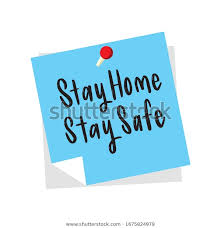

If you like the notebook please do upvote